In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
Age = np.array([31, 32, 33, 35, 36, 38, 45, 48, 49, 52, 54, 58])
Insurance = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
df = pd.DataFrame(Age.reshape(-1,1))
df["Target"] = Insurance

In [4]:
df

,0,Target
0,31,0
1,32,0
2,33,0
3,35,0
4,36,0
5,38,0
6,45,1
7,48,1
8,49,1
9,52,1


In [5]:
df.columns = ["Age", "Target"]

In [6]:
df

,Age,Target
0,31,0
1,32,0
2,33,0
3,35,0
4,36,0
5,38,0
6,45,1
7,48,1
8,49,1
9,52,1


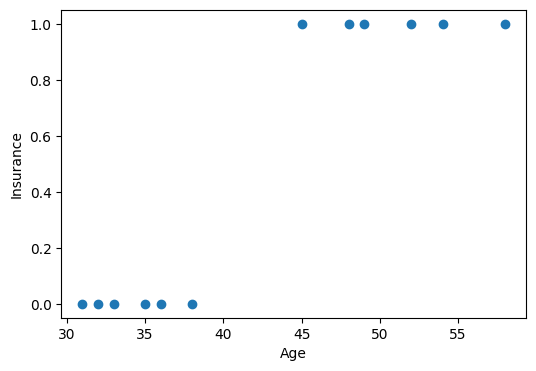

In [7]:
plt.figure(figsize=(6,4))
plt.xlabel("Age")
plt.ylabel("Insurance")
plt.scatter(df["Age"], df["Target"])
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()

In [10]:
X = df.drop("Target",axis=1)
y = df["Target"]

In [11]:
X.head()

,Age
0,31
1,32
2,33
3,35
4,36


In [12]:
y

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
Name: Target, dtype: int32

In [13]:
model.fit(X,y)

LogisticRegression()

In [14]:
model.predict([[34]])

array([0])

In [15]:
model.predict([[56]])

array([1])

In [16]:
model.predict([[52]])

array([1])

In [19]:
model.predict_proba([[34]])

array([[0.99649126, 0.00350874]])

In [21]:
model.predict_proba([[56]])

array([[2.36415432e-05, 9.99976358e-01]])

In [23]:
model.predict_proba([[52]])

array([[4.57818992e-04, 9.99542181e-01]])

In [24]:
model.predict_proba([[43]])

array([[0.26506682, 0.73493318]])

In [26]:
np.argmax(model.predict_proba([[56]]))

1

In [27]:
np.argmax(model.predict_proba([[34]]))

0

In [28]:
m = model.coef_
m

array([[0.74097568]])

In [30]:
c = model.intercept_
c

array([-30.84215642])

In [31]:
proba = 1 / (1 + (np.exp(-(m*(np.arange(30,60))+c))))
proba

array([[1.81715576e-04, 3.81159861e-04, 7.99331798e-04, 1.67551278e-03,
        3.50873980e-03, 7.33302038e-03, 1.52616613e-02, 3.14909874e-02,
        6.38594696e-02, 1.25197567e-01, 2.30918987e-01, 3.86475032e-01,
        5.69257393e-01, 7.34933184e-01, 8.53306488e-01, 9.24264341e-01,
        9.62410803e-01, 9.81723621e-01, 9.91204460e-01, 9.95788230e-01,
        9.97988031e-01, 9.99039987e-01, 9.99542181e-01, 9.99781729e-01,
        9.99895949e-01, 9.99950402e-01, 9.99976358e-01, 9.99988731e-01,
        9.99994629e-01, 9.99997440e-01]])

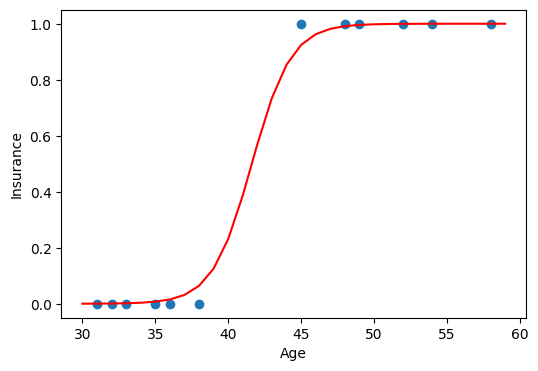

In [34]:
plt.figure(figsize=(6,4))
plt.xlabel("Age")
plt.ylabel("Insurance")
plt.scatter(df["Age"],df["Target"])
plt.plot(np.arange(30,60),proba.reshape(-1,1),color="red")
plt.show()